# 🏡 Dataset: Usecase 7 - Football Players Transfer Fee Prediction
# 📅 Date: 2025-03-1
# ✍️ Author: Sultan 

## Import Libraries

In [57]:
# To ignore warnings
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

%matplotlib inline

## Load the Data

In [58]:
#Read in the csv file and convert to a Pandas dataframe
football = pd.read_csv('Data/final_data.csv')

In [59]:
print(f"The shape is:{football.shape}")

The shape is:(10754, 22)


In [60]:
football.describe(include="object").T

,count,unique,top,freq
player,10754,10754,/david-de-gea/profil/spieler/59377,1
team,10754,374,Daejeon Hana Citizen,46
name,10754,10584,Paulinho,6
position,10754,16,Defender Centre-Back,1821


## Preprocess the Data

## 1. Data Profiling:
Data profiling is a comprehensive process of examining the data available in an existing dataset and collecting statistics and information about that data. 

In [61]:
football.head(10)

,player,team,name,position,height,age,appearance,goals,assists,yellow cards,...,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
0,/david-de-gea/profil/spieler/59377,Manchester United,David de Gea,Goalkeeper,189.0,32.0,104,0.000000,0.000000,0.009585,...,1.217252,0.335463,9390,42,5,13,15000000,70000000,1,0
1,/jack-butland/profil/spieler/128899,Manchester United,Jack Butland,Goalkeeper,196.0,30.0,15,0.000000,0.000000,0.069018,...,1.242331,0.207055,1304,510,58,1,1500000,22000000,1,0
2,/tom-heaton/profil/spieler/34130,Manchester United,Tom Heaton,Goalkeeper,188.0,37.0,4,0.000000,0.000000,0.000000,...,0.616438,0.924658,292,697,84,4,600000,6000000,1,0
3,/lisandro-martinez/profil/spieler/480762,Manchester United,Lisandro Martínez,Defender Centre-Back,175.0,25.0,82,0.028090,0.056180,0.224719,...,0.000000,0.000000,6408,175,22,9,50000000,50000000,2,0
4,/raphael-varane/profil/spieler/164770,Manchester United,Raphaël Varane,Defender Centre-Back,191.0,30.0,63,0.017889,0.017889,0.053667,...,0.000000,0.000000,5031,238,51,21,40000000,80000000,2,0
5,/harry-maguire/profil/spieler/177907,Manchester United,Harry Maguire,Defender Centre-Back,194.0,30.0,68,0.037799,0.000000,0.302394,...,0.000000,0.000000,4762,148,27,1,25000000,70000000,2,0
6,/victor-lindelof/profil/spieler/184573,Manchester United,Victor Lindelöf,Defender Centre-Back,187.0,28.0,70,0.000000,0.032901,0.115153,...,0.000000,0.000000,5471,95,19,10,15000000,35000000,2,0
7,/phil-jones/profil/spieler/117996,Manchester United,Phil Jones,Defender Centre-Back,185.0,31.0,8,0.000000,0.000000,0.216346,...,0.000000,0.000000,416,932,169,7,2000000,20000000,2,0
8,/teden-mengi/profil/spieler/548470,Manchester United,Teden Mengi,Defender Centre-Back,186.0,21.0,34,0.000000,0.000000,0.130529,...,0.000000,0.000000,2758,47,13,0,2000000,2000000,2,0
9,/luke-shaw/profil/spieler/183288,Manchester United,Luke Shaw,Defender Left-Back,178.0,27.0,74,0.015374,0.169115,0.353604,...,0.000000,0.000000,5854,443,70,4,35000000,42000000,2,1


In [40]:
football['player'][0]

'/david-de-gea/profil/spieler/59377'

,player,team,name,position,height,age,appearance,goals,assists,yellow cards,...,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
29,/mason-greenwood/profil/spieler/532826,Manchester United,Mason Greenwood,Attack-RightWinger,181.000000,21.0,24,0.317647,0.105882,0.105882,...,0.000000,0.0,1700,135,12,0,0,50000000,4,1
440,/benjamin-mendy/profil/spieler/157495,Manchester City,Benjamin Mendy,Defender Left-Back,185.000000,28.0,2,0.000000,0.000000,0.000000,...,0.000000,0.0,169,696,121,13,0,45000000,2,1
1738,/orji-okwonkwo/profil/spieler/401935,Bologna FC 1909,Orji Okwonkwo,Attack-RightWinger,180.000000,25.0,21,0.478088,0.119522,0.119522,...,0.000000,0.0,1506,143,22,2,0,2000000,4,1
1751,/armando-izzo/profil/spieler/32113,AC Monza,Armando Izzo,Defender Centre-Back,183.000000,31.0,44,0.028754,0.028754,0.402556,...,0.000000,0.0,3130,242,43,1,0,25000000,2,0
2101,/mohamed-ihattaren/profil/spieler/503638,Juventus FC,Mohamed Ihattaren,midfield-AttackingMidfield,183.000000,21.0,6,1.304348,0.652174,0.000000,...,0.000000,0.0,276,0,0,3,0,22000000,3,0
3422,/marcos-vinicius/profil/spieler/594006,Coritiba Foot Ball Club,Marcos Vinícius,Defender Right-Back,176.000000,26.0,3,0.000000,0.000000,0.720000,...,0.000000,0.0,125,39,8,0,0,175000,2,1
3504,/henrique-dourado/profil/spieler/270959,Cruzeiro Esporte Clube,Henrique Dourado,Attack Centre-Forward,186.000000,33.0,7,0.346154,0.000000,0.346154,...,0.000000,0.0,260,220,19,1,0,4000000,4,0
3550,/patric-calmon/profil/spieler/373192,Cuiabá Esporte Clube (MT),Patric Calmon,Defender Left-Back,181.000000,28.0,6,0.000000,0.000000,0.242588,...,0.000000,0.0,371,0,0,0,0,100000,2,1
7462,/cj-fodrey/profil/spieler/881090,Austin FC,CJ Fodrey,Attack Centre-Forward,188.000000,19.0,13,0.120643,0.000000,0.482574,...,0.000000,0.0,746,32,0,0,0,25000,4,0
8233,/sebastian-villa/profil/spieler/493000,CA Boca Juniors,Sebastián Villa,Attack-LeftWinger,179.000000,27.0,20,0.000000,0.117955,0.058978,...,0.000000,0.0,1526,67,15,8,0,10000000,4,1


In [41]:
# Player Information  
# Name: Full name of the player Ex: (Lionel Messi The Goat).  
# Player ID: A unique identifier for the player, represented as a URL (/david-de-gea/profil/spieler/59377).  
# Team: The club the player currently plays for Ex: (Real Madrid).  
# Position: The primary position the player plays in (Goalkeeper, Defender, Midfielder, Forward).  
# Height: The player's height in cm.  
# Age: The player's age.  

# Performance Statistics  
# Appearances: Total matches played.  
# Goals: Total number of goals scored.  
# Assists: Number of assists provided.  
# Yellow Cards: Number of yellow cards received.  
# Second Yellow Cards: Number of times the player has received a second yellow (leading to a red card).  
# Red Cards: Number of direct red cards received.  

# Goalkeeper-Specific Stats (Applicable only to goalkeepers).
# Goals Conceded (Per Match): Average number of goals the player concedes per game.  
# Clean Sheets: Number of matches where the goalkeeper did not concede any goals.  

# Playing Time & Injuries  
# Minutes Played: Total minutes spent on the field (10 to 10,000+).  
# Days Injured: Number of days the player has been unavailable due to injuries.  
# Games Missed Due to Injury: Number of matches the player missed because of injuries.  

# Achievements & Market Value  
# Awards Won: Number of individual awards the player has received.  
# Current Market Value (€): The player’s estimated current market worth.  
# Highest Market Value (€): The highest recorded market value of the player.  

# Position Encoding & Winger Status  
# Position Encoding: A numerical representation of the player’s role:  
#   1 = Goalkeeper  
#   2 = Defender  
#   3 = Midfielder  
#   4 = Forward  
# Winger: Indicates whether the player primarily plays as a winger with two value (0 = No , 1 = Yes). 


#### 1. Reliability:
Evaluate the data's source and collection process to determine its trustworthiness.
__________________

In [42]:
# The Data Source is Transfermarkt: https://www.transfermarkt.com/ and it's a well-known football statistics and transfer market website.
# Which is leading us to indicate that Source is trustworthy in other word it's it's Reliabe.

#### 2. Timeliness: 
Ensure the data is up-to-date and reflective of the current situation or the period of interest for the analysis.
_____________

In [43]:
# The data spans across the 2021-2022 and 2022-2023 seasons, providing relevant context for predicting player transfer prices.  

#### 3. Consistency: 

Confirm that the data is consistent within the dataset and across multiple data sources. For example, the same data point should not have different values in different places.
____________


In [44]:
# Consistency in this dataset is maintained through standardized player metrics, ensuring uniformity in how data is recorded across seasons.  
# The player statistics, including goals, assists, injuries, and awards, are consistently represented, allowing for accurate comparisons and analysis over time.

#### 4. Relevance: 
_____________

In [45]:
# The dataset is highly relevant for analysis as it captures player performance metrics from the 2021-2023 seasons.

#### 5. Uniqueness: 
Check for and remove duplicate records to prevent skewed analysis results.
______________

In [46]:
# Display the duplicate rows and make sure there no duplicate rows accross the dataset
football[football.duplicated()]

,player,team,name,position,height,age,appearance,goals,assists,yellow cards,...,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger


In [47]:
# Display the duplicate rows and make sure there no duplicate rows accross the dataset
football[football['player'].duplicated()]

,player,team,name,position,height,age,appearance,goals,assists,yellow cards,...,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger


In [48]:
# Display the duplicate rows and make sure there no duplicate rows accross the dataset
football[football.duplicated(['name', 'position'], keep=False)].head(5)

,player,team,name,position,height,age,appearance,goals,assists,yellow cards,...,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
380,/rhys-williams/profil/spieler/503679,Liverpool FC,Rhys Williams,Defender Centre-Back,195.0,22.0,39,0.093232,0.062155,0.248619,...,0.0,0.0,2896,50,10,0,3000000,5000000,2,0
385,/fabinho/profil/spieler/225693,Liverpool FC,Fabinho,midfield-DefensiveMidfield,188.0,29.0,97,0.099571,0.037339,0.273821,...,0.0,0.0,7231,140,29,8,45000000,70000000,3,0
1052,/andre-silva/profil/spieler/198008,RB Leipzig,André Silva,Attack Centre-Forward,185.0,27.0,95,0.403379,0.263748,0.077573,...,0.0,0.0,5801,221,15,4,20000000,45000000,4,0
1107,/luiz-felipe/profil/spieler/457931,Real Betis Balompié,Luiz Felipe,Defender Centre-Back,187.0,26.0,70,0.000000,0.015712,0.282821,...,0.0,0.0,5728,318,49,3,15000000,22000000,2,0
1194,/fernando/profil/spieler/51174,Sevilla FC,Fernando,midfield-DefensiveMidfield,183.0,35.0,68,0.017199,0.034397,0.171985,...,0.0,0.0,5233,516,75,19,3000000,17500000,3,0


In [49]:
# Display the duplicate rows and make sure there no duplicate rows accross the dataset
football[football.duplicated(['name', 'position', 'team'], keep=False)]

,player,team,name,position,height,age,appearance,goals,assists,yellow cards,...,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger


In [50]:
# The dataset reflects player transfers between the 2021-2022 and 2022-2023 seasons, with players appearing multiple times for different teams.  
# Each record represents a unique player-team-season combination, and no exact duplicate rows were found, ensuring accurate tracking of transfers.
# Thefore, The dataset is free of duplicate rows, ensuring data integrity and consistency throughout the analysis.

#### 6. Completeness: 
Ensure that no critical data is missing. This might mean checking for null values or required fields that are empty.
___________

In [51]:
# Display number missing values per column
football.isnull().sum()

player                 0
team                   0
name                   0
position               0
height                 0
age                    0
appearance             0
goals                  0
assists                0
yellow cards           0
second yellow cards    0
red cards              0
goals conceded         0
clean sheets           0
minutes played         0
days_injured           0
games_injured          0
award                  0
current_value          0
highest_value          0
position_encoded       0
winger                 0
dtype: int64

In [52]:
# The is dataset Clean and have no NaN values

#### 7. Check Accuracy:

Verify that the data is correct and precise. This could involve comparing data samples with known sources or using validation rules.


In [53]:
# check columns types 
football.dtypes

player                  object
team                    object
name                    object
position                object
height                 float64
age                    float64
appearance               int64
goals                  float64
assists                float64
yellow cards           float64
second yellow cards    float64
red cards              float64
goals conceded         float64
clean sheets           float64
minutes played           int64
days_injured             int64
games_injured            int64
award                    int64
current_value            int64
highest_value            int64
position_encoded         int64
winger                   int64
dtype: object

In [72]:
# Filter players whose current value is 0 but had a nonzero highest value in the past
football[(football['current_value'] == 0)]#.value_counts().sum()

,player,team,name,position,height,age,appearance,goals,assists,yellow cards,...,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
29,/mason-greenwood/profil/spieler/532826,Manchester United,Mason Greenwood,Attack-RightWinger,181.000000,21.000000,24,0.317647,0.105882,0.105882,...,0.0,0.0,1700,135,12,0,0,50000000,4,1
406,/sven-botman/profil/spieler/361093,Newcastle United,Sven Botman,Defender Centre-Back,195.000000,23.000000,76,0.041159,0.013720,0.123476,...,0.0,0.0,6560,118,19,4,0,0,2,0
407,/fabian-schar/profil/spieler/135343,Newcastle United,Fabian Schär,Defender Centre-Back,186.000000,31.000000,67,0.045678,0.076129,0.182710,...,0.0,0.0,5911,285,30,3,0,0,2,0
408,/jamaal-lascelles/profil/spieler/183318,Newcastle United,Jamaal Lascelles,Defender Centre-Back,188.000000,29.000000,38,0.068992,0.000000,0.310464,...,0.0,0.0,2609,418,57,2,0,0,2,0
409,/matt-targett/profil/spieler/250478,Newcastle United,Matt Targett,Defender Left-Back,183.000000,27.000000,54,0.023747,0.023747,0.094987,...,0.0,0.0,3790,380,66,0,0,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10581,/zahi-addis/profil/spieler/1069563,Brisbane Roar,Zahi Addis,Defender Left-Back,181.240353,19.000000,0,0.000000,0.000000,0.000000,...,0.0,0.0,0,0,0,0,0,0,2,1
10586,/james-murphy/profil/spieler/1069560,Brisbane Roar,James Murphy,midfield,181.240353,17.000000,0,0.000000,0.000000,0.000000,...,0.0,0.0,0,0,0,0,0,0,3,0
10587,/riley-gill/profil/spieler/1069561,Brisbane Roar,Riley Gill,midfield,181.240353,26.041903,0,0.000000,0.000000,0.000000,...,0.0,0.0,0,0,0,0,0,0,3,0
10686,/corey-hollman/profil/spieler/890186,Sydney FC,Corey Hollman,midfield-DefensiveMidfield,181.240353,19.000000,1,0.000000,0.000000,0.000000,...,0.0,0.0,3,0,0,0,0,0,3,0


In [71]:
# Filter players whose current value is 0 but had a nonzero highest value in the past
football[(football['current_value'] == 0) & (football['highest_value'] != 0)]#.value_counts().sum()

,player,team,name,position,height,age,appearance,goals,assists,yellow cards,...,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
29,/mason-greenwood/profil/spieler/532826,Manchester United,Mason Greenwood,Attack-RightWinger,181.000000,21.0,24,0.317647,0.105882,0.105882,...,0.000000,0.0,1700,135,12,0,0,50000000,4,1
440,/benjamin-mendy/profil/spieler/157495,Manchester City,Benjamin Mendy,Defender Left-Back,185.000000,28.0,2,0.000000,0.000000,0.000000,...,0.000000,0.0,169,696,121,13,0,45000000,2,1
1738,/orji-okwonkwo/profil/spieler/401935,Bologna FC 1909,Orji Okwonkwo,Attack-RightWinger,180.000000,25.0,21,0.478088,0.119522,0.119522,...,0.000000,0.0,1506,143,22,2,0,2000000,4,1
1751,/armando-izzo/profil/spieler/32113,AC Monza,Armando Izzo,Defender Centre-Back,183.000000,31.0,44,0.028754,0.028754,0.402556,...,0.000000,0.0,3130,242,43,1,0,25000000,2,0
2101,/mohamed-ihattaren/profil/spieler/503638,Juventus FC,Mohamed Ihattaren,midfield-AttackingMidfield,183.000000,21.0,6,1.304348,0.652174,0.000000,...,0.000000,0.0,276,0,0,3,0,22000000,3,0
3422,/marcos-vinicius/profil/spieler/594006,Coritiba Foot Ball Club,Marcos Vinícius,Defender Right-Back,176.000000,26.0,3,0.000000,0.000000,0.720000,...,0.000000,0.0,125,39,8,0,0,175000,2,1
3504,/henrique-dourado/profil/spieler/270959,Cruzeiro Esporte Clube,Henrique Dourado,Attack Centre-Forward,186.000000,33.0,7,0.346154,0.000000,0.346154,...,0.000000,0.0,260,220,19,1,0,4000000,4,0
3550,/patric-calmon/profil/spieler/373192,Cuiabá Esporte Clube (MT),Patric Calmon,Defender Left-Back,181.000000,28.0,6,0.000000,0.000000,0.242588,...,0.000000,0.0,371,0,0,0,0,100000,2,1
7462,/cj-fodrey/profil/spieler/881090,Austin FC,CJ Fodrey,Attack Centre-Forward,188.000000,19.0,13,0.120643,0.000000,0.482574,...,0.000000,0.0,746,32,0,0,0,25000,4,0
8233,/sebastian-villa/profil/spieler/493000,CA Boca Juniors,Sebastián Villa,Attack-LeftWinger,179.000000,27.0,20,0.000000,0.117955,0.058978,...,0.000000,0.0,1526,67,15,8,0,10000000,4,1


In [73]:
# Drop players where both current_value and highest_value are 0
football = football[~((football['current_value'] == 0) & (football['highest_value'] == 0))]

# Players with current_value = 0 but highest_value ≠ 0 may be due to penalties

In [76]:
# Add a new column 'penalty_flag' to indicate possible penalties
football['penalty_flag'] = ((football['current_value'] == 0) & (football['highest_value'] != 0)).astype(int)
football[(football['current_value'] == 0) & (football['highest_value'] != 0)].head()

,player,team,name,position,height,age,appearance,goals,assists,yellow cards,...,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger,penalty_flag
29,/mason-greenwood/profil/spieler/532826,Manchester United,Mason Greenwood,Attack-RightWinger,181.0,21.0,24,0.317647,0.105882,0.105882,...,0.0,1700,135,12,0,0,50000000,4,1,1
440,/benjamin-mendy/profil/spieler/157495,Manchester City,Benjamin Mendy,Defender Left-Back,185.0,28.0,2,0.000000,0.000000,0.000000,...,0.0,169,696,121,13,0,45000000,2,1,1
1738,/orji-okwonkwo/profil/spieler/401935,Bologna FC 1909,Orji Okwonkwo,Attack-RightWinger,180.0,25.0,21,0.478088,0.119522,0.119522,...,0.0,1506,143,22,2,0,2000000,4,1,1
1751,/armando-izzo/profil/spieler/32113,AC Monza,Armando Izzo,Defender Centre-Back,183.0,31.0,44,0.028754,0.028754,0.402556,...,0.0,3130,242,43,1,0,25000000,2,0,1
2101,/mohamed-ihattaren/profil/spieler/503638,Juventus FC,Mohamed Ihattaren,midfield-AttackingMidfield,183.0,21.0,6,1.304348,0.652174,0.000000,...,0.0,276,0,0,3,0,22000000,3,0,1


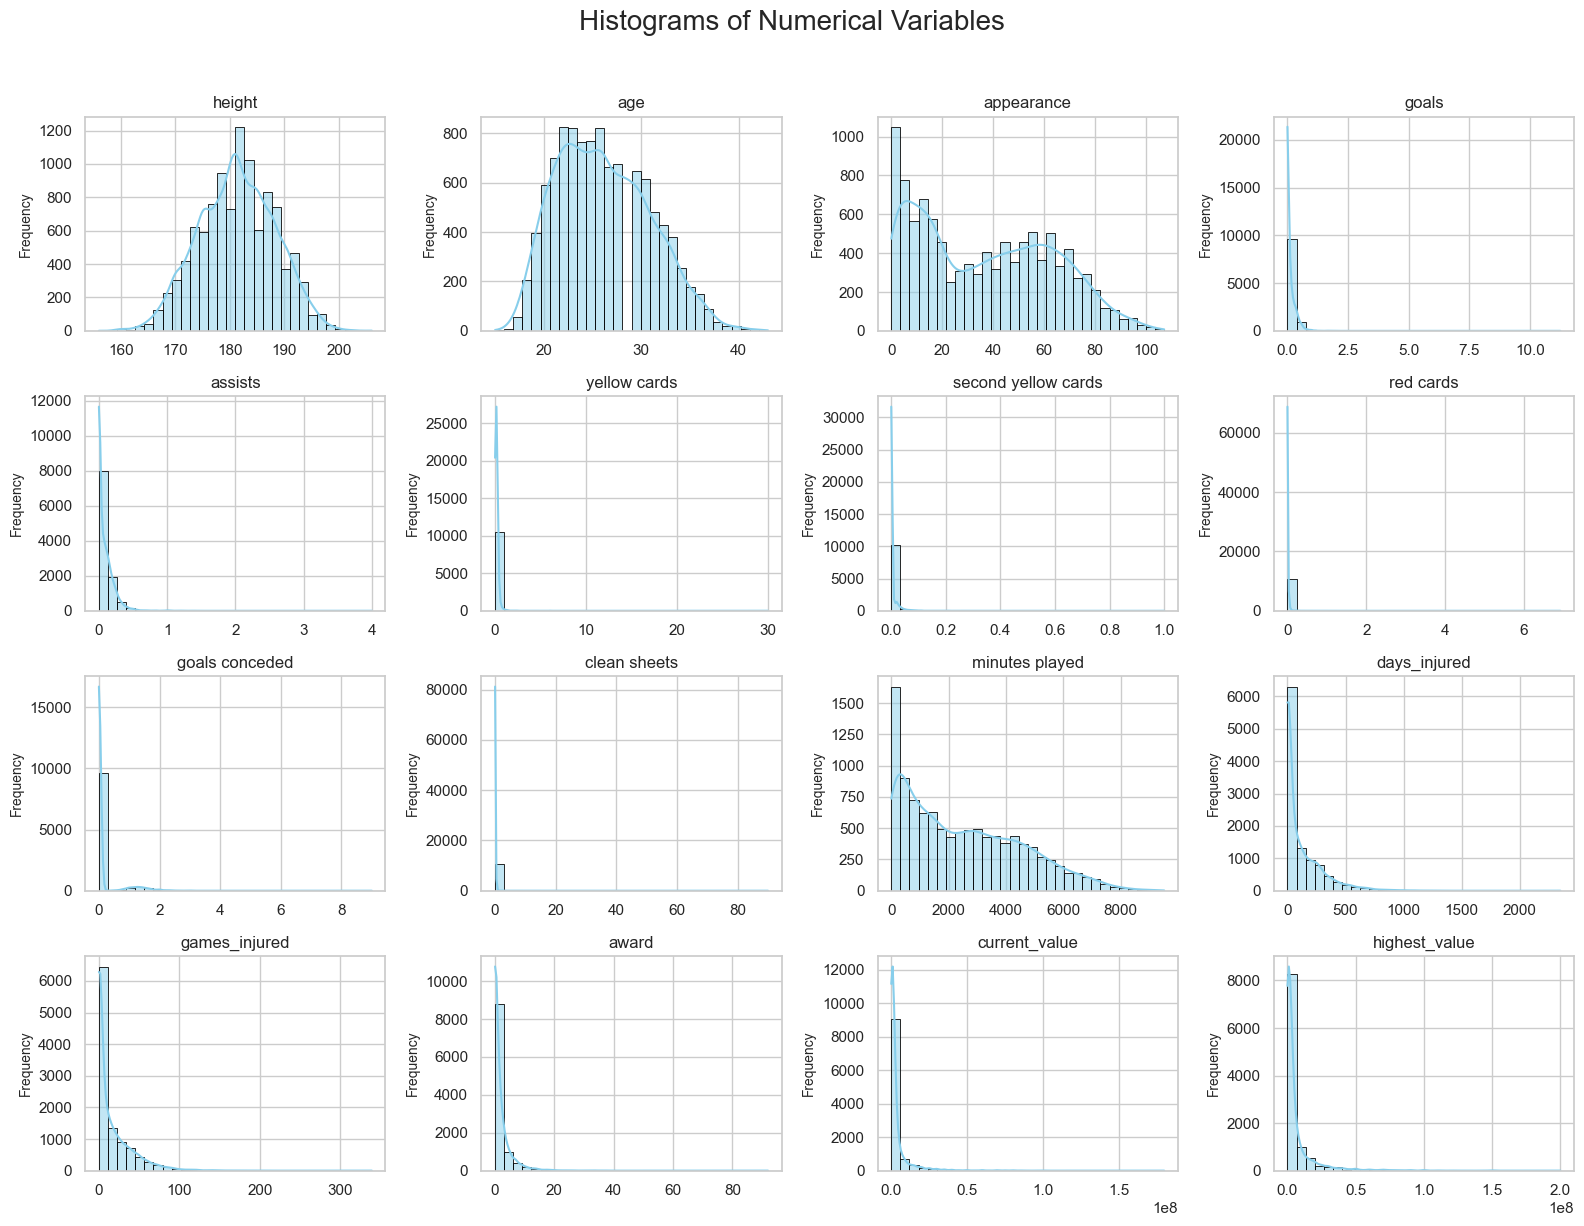

In [74]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of numerical columns to visualize
numerical_columns = [
    'height', 'age', 'appearance', 'goals', 'assists', 'yellow cards', 
    'second yellow cards', 'red cards', 'goals conceded', 'clean sheets', 
    'minutes played', 'days_injured', 'games_injured', 'award', 
    'current_value', 'highest_value'
]

# Set the aesthetic style of the plots
sns.set(style="whitegrid", palette="pastel")

# Set up the figure for histograms
plt.figure(figsize=(16, 12))  # Increased figure size for better spacing
plt.suptitle("Histograms of Numerical Variables", fontsize=20, y=1.02)  # Added a super title

# Loop through each numerical column and create histograms
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(4, 4, i)  # Organize subplots in a 4x4 grid
    sns.histplot(football[col], bins=30, kde=True, color='skyblue', edgecolor='black')
    plt.title(col, fontsize=12)  # Add column name as title
    plt.xlabel("")  # Remove x-axis label for cleaner look
    plt.ylabel("Frequency", fontsize=10)  # Add y-axis label

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

In [78]:
football.drop(columns=["name","player"],inplace=True)

#### 2. Feature engineering

1. Feature scaling
2. Aggregation
3. One hot coding

In [79]:
football.head(2)

,team,position,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,...,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger,penalty_flag
0,Manchester United,Goalkeeper,189.0,32.0,104,0.0,0.0,0.009585,0.0,0.0,...,0.335463,9390,42,5,13,15000000,70000000,1,0,0
1,Manchester United,Goalkeeper,196.0,30.0,15,0.0,0.0,0.069018,0.0,0.0,...,0.207055,1304,510,58,1,1500000,22000000,1,0,0


In [81]:
# Numerical Columns (Quantitative Features)
# These columns contain continuous or discrete numerical values used for statistical analysis,
# correlation studies, and machine learning models. They represent measurable quantities.

numerical_columns = [
    'height', 'age', 'appearance', 'goals', 'assists', 'yellow cards',
    'second yellow cards', 'red cards', 'goals conceded', 'clean sheets',
    'minutes played', 'days_injured', 'games_injured', 'award',
    'current_value', 'highest_value', 'position_encoded', 'winger', 'penalty_flag'
    
]

# Categorical Columns (Qualitative Features)
# These columns represent categories or labels. They are used for classification tasks, grouping,
# and often need to be transformed into numerical values
# during preprocessing for machine learning models.
categorical_columns = [
     'team', 'position'
]

In [82]:
categorical_columns

['team', 'position']

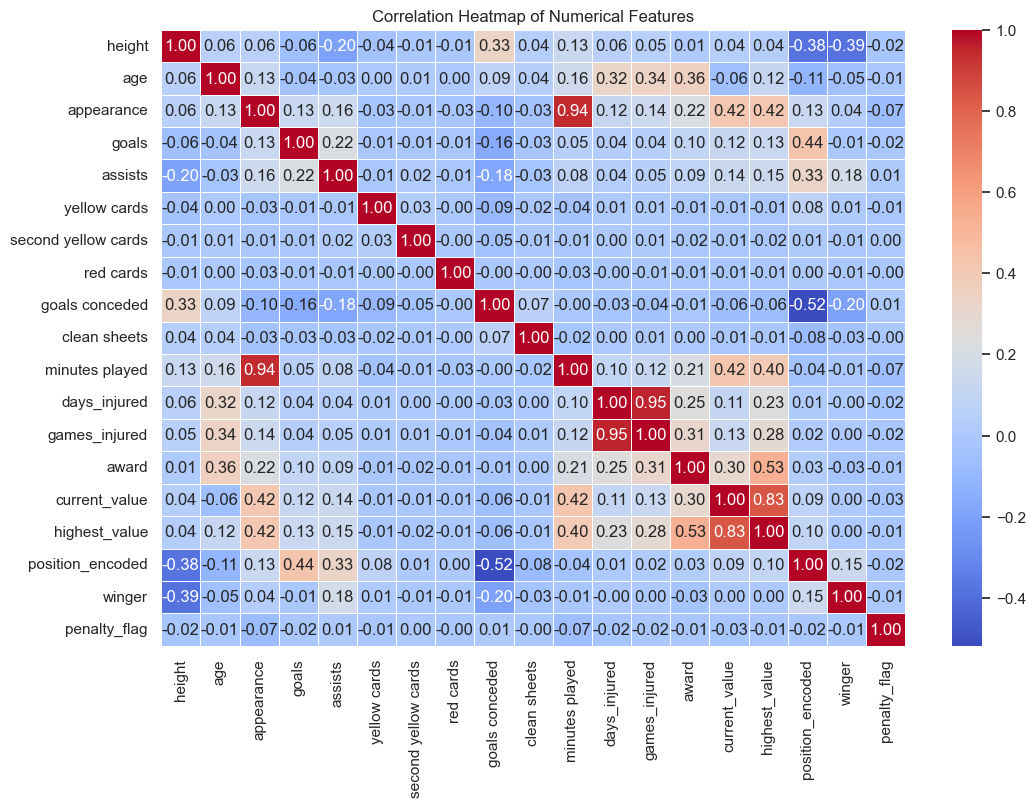

In [83]:


# Calculate the correlation matrix
correlation_matrix = football[numerical_columns].corr()

# Create the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Show the plot
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

In [ ]:
# The features most correlated with 'current_value' are 'appearance' and 'minutes played', 
# both showing correlations around 0.4, followed by 'award'.
# Other positively correlated features include 'goals', 'assists', 'days_injured', and 'games_injured'.
# This indicates that player values are strongly influenced by their performance metrics.
# 'highest_value' shows a different correlation pattern.

In [ ]:
# Feature engineering
# football['goal+assists']=football['goals']+football['assists']
# football['Value Change']=football['highest_value']-football['current_value']

In [ ]:
# Add the new feature to list of num columns
# new_numerical_columns = [
#     'height', 'age', 'yellow cards', 'second yellow cards', 
#     'red cards', 'goals conceded', 'clean sheets', 'days_injured', 
#     'games_injured', 'award', 'current_value', 'highest_value', 
#     'position_encoded', 'winger', 'goal+assists', 
#     'Value Change', 'appearance', 
# ]

In [84]:
# one hot coding
df = pd.get_dummies(football, columns=categorical_columns)

In [85]:
df.shape

(10629, 409)

In [86]:
df.head(2)

,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,goals conceded,clean sheets,...,position_Defender Centre-Back,position_Defender Left-Back,position_Defender Right-Back,position_Goalkeeper,position_midfield,position_midfield-AttackingMidfield,position_midfield-CentralMidfield,position_midfield-DefensiveMidfield,position_midfield-LeftMidfield,position_midfield-RightMidfield
0,189.0,32.0,104,0.0,0.0,0.009585,0.0,0.0,1.217252,0.335463,...,False,False,False,True,False,False,False,False,False,False
1,196.0,30.0,15,0.0,0.0,0.069018,0.0,0.0,1.242331,0.207055,...,False,False,False,True,False,False,False,False,False,False


#### 3. Feature selection

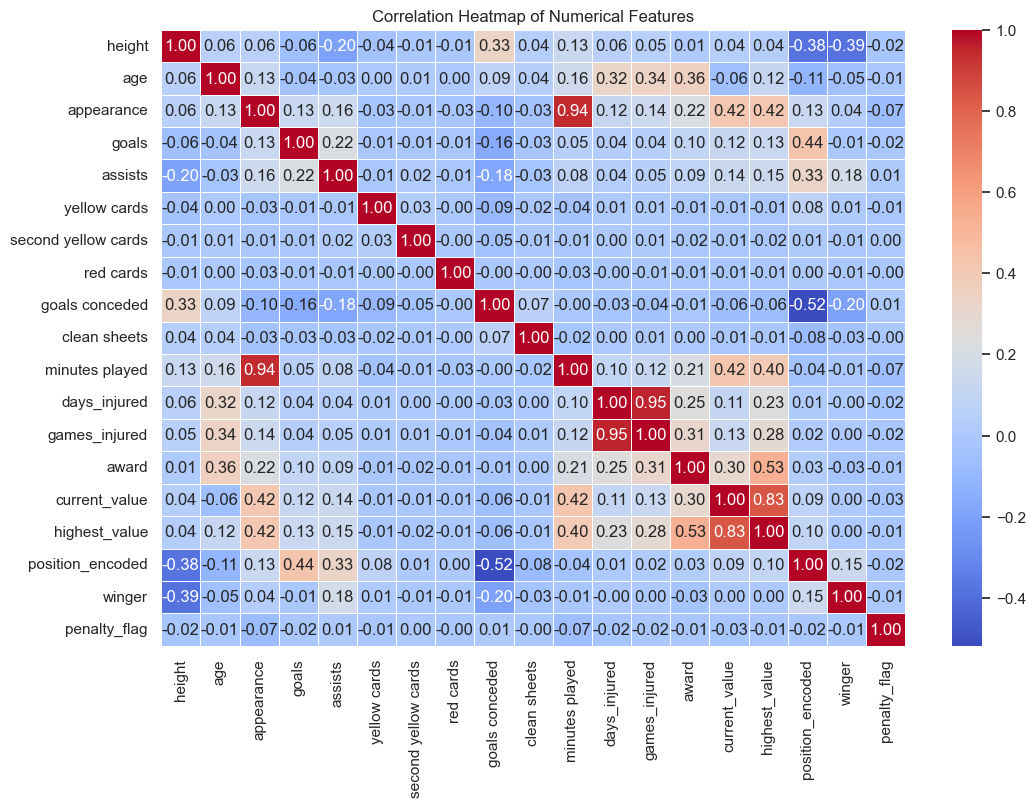

In [87]:


# Calculate the correlation matrix
correlation_matrix = football[numerical_columns].corr()

# Create the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Show the plot
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

In [ ]:
# The features most correlated with 'current_value' are 'appearance' and 'minutes played', 
# both showing correlations around 0.4, followed by 'award'.
# Other positively correlated features include 'goals', 'assists', 'days_injured', and 'games_injured'.
# This indicates that player values are strongly influenced by their performance metrics.
# 'highest_value' shows a different correlation pattern.

In [88]:
correlation= df.corr()
print(correlation['current_value'].sort_values(ascending=False))

current_value          1.000000
highest_value          0.834215
minutes played         0.419732
appearance             0.418747
award                  0.299026
                         ...   
position_Attack       -0.025798
position_midfield     -0.030268
age                   -0.056788
goals conceded        -0.064090
position_Goalkeeper   -0.078175
Name: current_value, Length: 409, dtype: float64


In [90]:
# Set the correlation threshold
threshold = 0.1 # You can change this value based on your requirement

# Filter the correlations
# We use `abs()` for absolute value to consider both strong positive and negative correlations
selected_features = correlation[abs(correlation['current_value']) > threshold]['current_value'].index
selected_features

Index(['appearance', 'goals', 'assists', 'minutes played', 'days_injured',
       'games_injured', 'award', 'current_value', 'highest_value',
       'team_Arsenal FC', 'team_Bayern Munich', 'team_Chelsea FC',
       'team_FC Barcelona', 'team_Liverpool FC', 'team_Manchester City',
       'team_Manchester United', 'team_Paris Saint-Germain',
       'team_Real Madrid', 'team_SSC Napoli', 'team_Tottenham Hotspur'],
      dtype='object')

In [92]:
features = [
        'appearance', 'goals', 'assists', 'minutes played', 'days_injured',
       'games_injured', 'award', 'current_value', 'highest_value',
        'team_Arsenal FC', 'team_Bayern Munich',
       'team_Chelsea FC', 'team_FC Barcelona', 'team_Liverpool FC',
       'team_Manchester City', 'team_Manchester United',
       'team_Paris Saint-Germain', 'team_Real Madrid', 'team_SSC Napoli',
       'team_Tottenham Hotspur', 'penalty_flag'
]

df = df[features]
df.head(2)

,appearance,goals,assists,minutes played,days_injured,games_injured,award,current_value,highest_value,team_Arsenal FC,...,team_Chelsea FC,team_FC Barcelona,team_Liverpool FC,team_Manchester City,team_Manchester United,team_Paris Saint-Germain,team_Real Madrid,team_SSC Napoli,team_Tottenham Hotspur,penalty_flag
0,104,0.0,0.0,9390,42,5,13,15000000,70000000,False,...,False,False,False,False,True,False,False,False,False,0
1,15,0.0,0.0,1304,510,58,1,1500000,22000000,False,...,False,False,False,False,True,False,False,False,False,0


In [93]:
df.shape

(10629, 21)

#### 4. Prepare train and test data

In [94]:
# Prepare data
X = df.drop(['current_value'], axis=1)
y = df['current_value']

In [95]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    shuffle=True,
                                                    random_state=44)

# sacle the data
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [96]:
X.shape

(10629, 20)

## Buliding the Model

In [97]:
model = LinearRegression()

In [98]:
ridge_model = Ridge()  

In [99]:
lasso_model = Lasso()  

In [100]:
param_grid = {
    'alpha': [0, 0.003, 0.0002, 0.001, 0.01, 0.5, 1, 5]  # Regularization strength
}
grid_search_ridge = GridSearchCV(estimator=ridge_model,
                           param_grid=param_grid,
                           cv=5,
                           scoring='neg_mean_squared_error', 
                           verbose=1)

grid_search_lasso = GridSearchCV(estimator=lasso_model,
                           param_grid=param_grid,
                           cv=5,
                           scoring='neg_mean_squared_error', 
                           verbose=1)

## Train the Model

In [101]:
# Fit the model on the training data
model.fit(X_train_scaled, y_train)

LinearRegression()

In [102]:
# Fit GridSearchCV on the training data
grid_search_ridge.fit(X_train_scaled, y_train)
grid_search_lasso.fit(X_train_scaled, y_train)

# Get the best parameters and best model

# Ridge
best_params_ridge = grid_search_ridge.best_params_
best_model_ridge = grid_search_ridge.best_estimator_

# Lasso
best_params_lasso = grid_search_lasso.best_params_
best_model_lasso = grid_search_lasso.best_estimator_

print("Best Parameters for ridge model:", best_params_ridge)
print("Best Parameters for lasso model:", best_params_lasso)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best Parameters for ridge model: {'alpha': 5}
Best Parameters for lasso model: {'alpha': 5}


## Test the Model

In [103]:
# Predict and evaluate the model

y_pred = model.predict(X_test_scaled)                  # Linear regression model
y_pred_ridge = best_model_ridge.predict(X_test_scaled) # Ridge model
y_pred_lasso = best_model_lasso.predict(X_test_scaled) # Lasso model

## Interpretation of the Model

In [104]:
coeff_df = pd.DataFrame(model.coef_,X.columns,columns=['Coefficient'])                  # Linear model cofficients
coeff_df_ridge = pd.DataFrame(best_model_ridge.coef_,X.columns,columns=['Coefficient']) # Ridge model cofficients
coeff_df_lasso = pd.DataFrame(best_model_lasso.coef_,X.columns,columns=['Coefficient']) # Lasso model cofficients


In [105]:
coeff_df

,Coefficient
appearance,-9.793882e+05
goals,2.304323e+05
assists,2.058303e+05
minutes played,1.917719e+06
days_injured,6.484402e+05
games_injured,-1.272411e+06
award,-1.722174e+06
highest_value,7.649272e+06
team_Arsenal FC,6.320248e+05
team_Bayern Munich,6.099056e+05


In [106]:
coeff_df_ridge

,Coefficient
appearance,-9.609307e+05
goals,2.296051e+05
assists,2.050935e+05
minutes played,1.901686e+06
days_injured,6.356341e+05
games_injured,-1.258896e+06
award,-1.718119e+06
highest_value,7.639348e+06
team_Arsenal FC,6.323633e+05
team_Bayern Munich,6.103778e+05


In [107]:
coeff_df_lasso

,Coefficient
appearance,-9.792801e+05
goals,2.304215e+05
assists,2.058196e+05
minutes played,1.917615e+06
days_injured,6.483303e+05
games_injured,-1.272302e+06
award,-1.722165e+06
highest_value,7.649265e+06
team_Arsenal FC,6.320186e+05
team_Bayern Munich,6.099002e+05


In [108]:
print(f" Linear regression intercept: {model.intercept_}") 

 Linear regression intercept: 3671431.2595554516


In [109]:
print(f" Ridge model intercept: {best_model_ridge.intercept_}") 

 Ridge model intercept: 3671431.2595554516


In [110]:
print(f" Lasso model intercept: {best_model_lasso.intercept_}") 

 Lasso model intercept: 3671431.2595554516


## Evaluating the Model 

1. Mean Square Error

In [111]:
y_base = [y_train.mean()] * len(y_test)

In [112]:
# our benchmark model
mse_base = mean_squared_error(y_test, y_base )
print(f'Mean Squared Error of base model: {mse_base:2e}')

Mean Squared Error of base model: 8.651626e+13


In [113]:
# MSE for Linear model
mse_train = mean_squared_error(y_train, model.predict(X_train_scaled))
mse_test = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error for training: {mse_train:2e}')
print(f'Mean Squared Error for testing: {mse_test:2e}')


Mean Squared Error for training: 2.042200e+13
Mean Squared Error for testing: 1.968809e+13


In [114]:
# MSE for Ridge model
mse_train_ridge = mean_squared_error(y_train, best_model_ridge.predict(X_train_scaled))
mse_test_ridge = mean_squared_error(y_test, y_pred_ridge)
print(f'Mean Squared Error for training ridge model: {mse_train_ridge:2e}')
print(f'Mean Squared Error for testing ridge model: {mse_test_ridge:2e}')


Mean Squared Error for training ridge model: 2.042209e+13
Mean Squared Error for testing ridge model: 1.969522e+13


In [115]:
# MSE Lasso model
mse_train_lasso = mean_squared_error(y_train, best_model_lasso.predict(X_train_scaled))
mse_test_lasso = mean_squared_error(y_test, y_pred_lasso)
print(f'Mean Squared Error for training lasso model: {mse_train_lasso:2e}')
print(f'Mean Squared Error for testing lasso model: {mse_test_lasso:2e}')

Mean Squared Error for training lasso model: 2.042200e+13
Mean Squared Error for testing lasso model: 1.968810e+13


2. Mean Absolute Error

In [116]:
# our benchmark model
mae_base = mean_absolute_error(y_test, y_base )
print(f'Mean Absolute  Error of base model: {mae_base:2e}')

Mean Absolute  Error of base model: 4.364499e+06


In [117]:
# Linear model
mae_train = mean_absolute_error(y_train, model.predict(X_train_scaled))
mae_test = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error for training: {mae_train:2e}')
print(f'Mean Absolute Error for testing: {mae_test:2e}')

Mean Absolute Error for training: 2.137077e+06
Mean Absolute Error for testing: 2.110746e+06


In [118]:
# MSE for Ridge model
mae_train_ridge = mean_absolute_error(y_train, best_model_ridge.predict(X_train_scaled))
mae_test_ridge = mean_absolute_error(y_test, y_pred_ridge)
print(f'Mean Absolute Error for training ridge model: {mae_train_ridge:2e}')
print(f'Mean Absolute Error for testing ridge model: {mae_test_ridge:2e}')

Mean Absolute Error for training ridge model: 2.136242e+06
Mean Absolute Error for testing ridge model: 2.110074e+06


In [119]:
# Lasso model
mae_train_lasso = mean_absolute_error(y_train, best_model_lasso.predict(X_train_scaled))
mae_test_lasso = mean_absolute_error(y_test, y_pred_lasso)
print(f'Mean Absolute Error for training lasso model: {mae_train_lasso:2e}')
print(f'Mean Absolute Error for testing lasso model: {mae_test_lasso:2e}')

Mean Absolute Error for training lasso model: 2.137070e+06
Mean Absolute Error for testing lasso model: 2.110740e+06


3. Root Mean Squared Error

In [120]:
# our benchmark model
print(f'Root Mean Squared  Error of base model: {np.sqrt(mse_base):2e}')

Root Mean Squared  Error of base model: 9.301412e+06


In [121]:
# RMSE for Linear model

print(f'Root Mean Squared Error for training: {np.sqrt(mse_train):2e}')
print(f'Root Mean Squared Error for testing: {np.sqrt(mse_test):2e}')

Root Mean Squared Error for training: 4.519071e+06
Root Mean Squared Error for testing: 4.437126e+06


In [122]:
# RMSE for Ridge model

print(f'Root Mean Squared Error for training ridge model: {np.sqrt(mse_train_ridge):2e}')
print(f'Root Mean Squared Error for testing ridge model: {np.sqrt(mse_test_ridge):2e}')


Root Mean Squared Error for training ridge model: 4.519081e+06
Root Mean Squared Error for testing ridge model: 4.437930e+06


In [123]:
# RMSE Lasso model

print(f'Root Mean Squared Error for training lasso model: {np.sqrt(mse_train_lasso):2e}')
print(f'Root Mean Squared Error for testing lasso model: {np.sqrt(mse_test_lasso):2e}')

Root Mean Squared Error for training lasso model: 4.519071e+06
Root Mean Squared Error for testing lasso model: 4.437127e+06


4. R Square

In [124]:
# Linear model r2 score
r2_score_train = r2_score(y_train, model.predict(X_train_scaled))
r2_score_test = r2_score(y_test, y_pred)
print(f'R Square for training: {r2_score_train}')
print(f'R Square for testing: {r2_score_test}')

R Square for training: 0.7533281195619012
R Square for testing: 0.7724325846274945


In [125]:
# Ridge model r2 score
r2_score_train_ridge = r2_score(y_train, best_model_ridge.predict(X_train_scaled))
r2_score_test_ridge = r2_score(y_test, y_pred_ridge)
print(f'R Square for training ridge model: {r2_score_train_ridge}')
print(f'R Square for testing ridge model: {r2_score_test_ridge}')

R Square for training ridge model: 0.753327023663928
R Square for testing ridge model: 0.7723501563456272


In [126]:
# Lasso model r2 score
r2_score_train_lasso = r2_score(y_train, best_model_lasso.predict(X_train_scaled))
r2_score_test_lasso = r2_score(y_test, y_pred_lasso)
print(f'R Square for training lasso model: {r2_score_train_lasso}')
print(f'R Square for testing lasso model: {r2_score_test_lasso}')

R Square for training lasso model: 0.753328119529196
R Square for testing lasso model: 0.7724324836357015


#### Predictions vs. Real Values

In [127]:
predictions = model.predict(X_test_scaled)
#predictions

In [128]:
predictions

array([ 7.29562677e+06, -5.92185086e+05,  6.65615679e+05, ...,
       -9.18523234e+06, -3.90829376e+04,  5.02593991e+07])

In [129]:
Real_Values = np.array(y_test)
# Real_Values

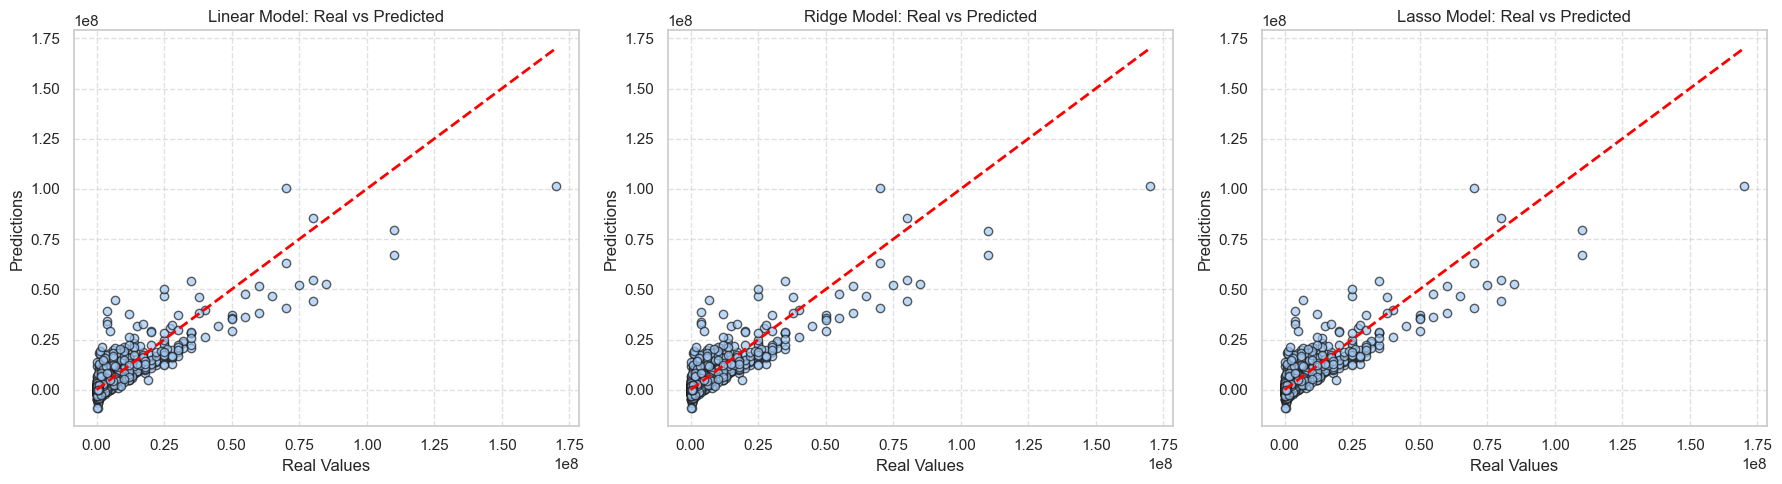

In [132]:
# Set seaborn style for better visualization
sns.set_style("whitegrid")

# Create a figure with three subplots in a row
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Models and their predictions
models = ['Linear Model', 'Ridge Model', 'Lasso Model']
predictions = [y_pred, y_pred_ridge, y_pred_lasso]

# Loop through models for better efficiency
for ax, model, y_pred_model in zip(axes, models, predictions):
    ax.scatter(y_test, y_pred_model, alpha=0.7, edgecolors='k')
    ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2, linestyle="--")
    ax.set_xlabel('Real Values')
    ax.set_ylabel('Predictions')
    ax.set_title(f'{model}: Real vs Predicted')
    ax.grid(True, linestyle='--', alpha=0.6)

# Adjust layout to avoid overlap
plt.tight_layout()

# Show the plots
plt.show()


#### Residual Histogram

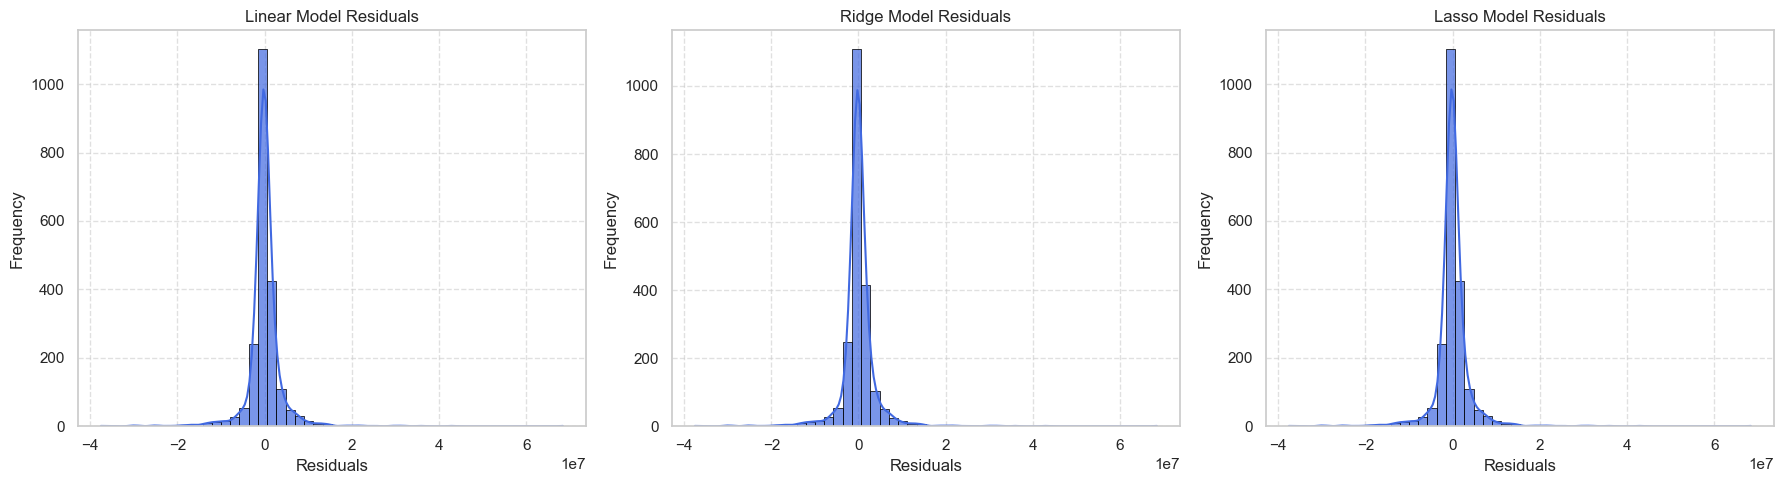

In [133]:
# Set seaborn style for cleaner visuals
sns.set_style("whitegrid")

# Create figure and subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Models and their residuals
models = ['Linear Model', 'Ridge Model', 'Lasso Model']
residuals = [y_test - y_pred, y_test - y_pred_ridge, y_test - y_pred_lasso]

# Loop through models to create residual plots
for ax, model, res in zip(axes, models, residuals):
    sns.histplot(res, bins=50, kde=True, ax=ax, color="royalblue", edgecolor='black', alpha=0.7)
    ax.set_title(f'{model} Residuals')
    ax.set_xlabel('Residuals')
    ax.set_ylabel('Frequency')
    ax.grid(True, linestyle='--', alpha=0.6)

# Adjust layout to avoid overlap
plt.tight_layout()

# Show the plots
plt.show()
